In [8]:
from ep_predictor.predictor_backend import preprocessing, ep_prediction

In [9]:
#Constant Setup
pctg=99
cutout_size=33

#EFM9: binary_threshold=0.04, object_size=3, hole_size=30, m_thresh=0.30
#EFM8: binary_threshold=0.41, object_size=3, hole_size=30, m_thresh=0.778
#EFM7: binary_threshold=0.095, object_size=4, hole_size=15, m_thresh=0.44
#EFVM: binary_threshold=0.05, object_size=2, hole_size=2, m_thresh=0.785

name='efm8'
curves_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\lifts'
topography_file=rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\FlattenTopo_.txt'
ref_file=rf"c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\Map_Ep.txt"
binary_threshold=0.067
object_size=3
hole_size=30
m_ep_thresh=0.3

c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:288: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  th=float(mask_ep.quantile(m_ep_thresh))
100%|██████████| 50176/50176 [00:07<00:00, 6336.52it/s]


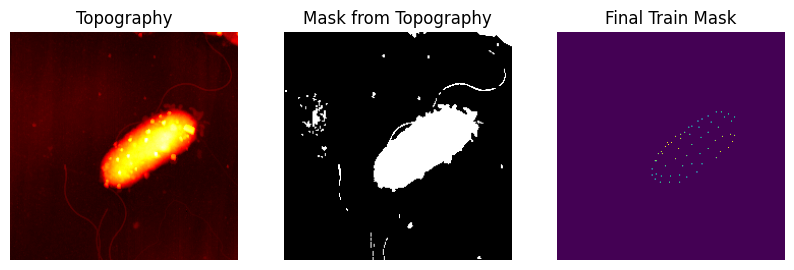

In [10]:
preproc = preprocessing(topography_file, curves_file, ref_file, cutout_size)
preproc.get_mask(binary_threshold, object_size, hole_size, m_ep_thresh)

preproc.get_fc(see_data=0, use_lifts=1)



In [11]:
preproc.get_conv(direct_mask=1)

100%|██████████| 5675/5675 [00:51<00:00, 109.57it/s]


In [12]:
preproc.get_tables(rf'c:\Users\mcano\Code\rawdata\img_data\FHRbact1\Out_GetEpOnpx_2024-4_from_OUT_qi_sh4_tip2-data-2023.11.10-16.34.43.387_21-Mar-2024-19-13-48\tablas')
preproc.add_tables()

100%|██████████| 360/360 [00:00<00:00, 1723.25it/s]


In [13]:
ep_predict=ep_prediction(preproc,pctg)
ep_predict.train(verb=0)

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
<function structural_similarity at 0x000001F1F4C5C860>


c:\Users\mcano\Code\FAST\fast_smart_scanning\work_directory\other_examples\ep_predictor\predictor_backend.py:465: RuntimeWarning: divide by zero encountered in divide
  error_map_r=(abs(np.subtract(y_mat, full_img_cell))/y_mat)*100


The error map presents 19 error values > 1 (31.67%)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


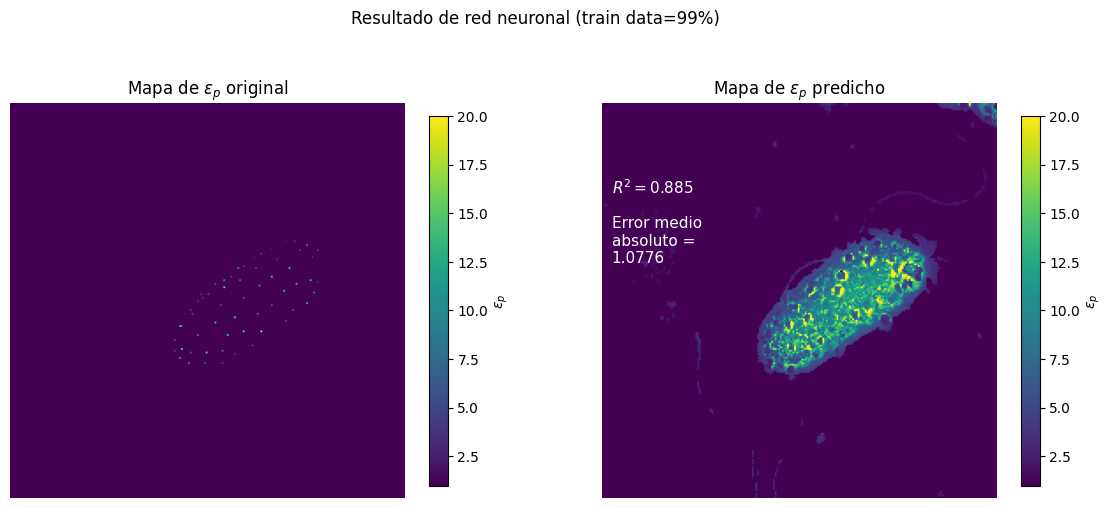

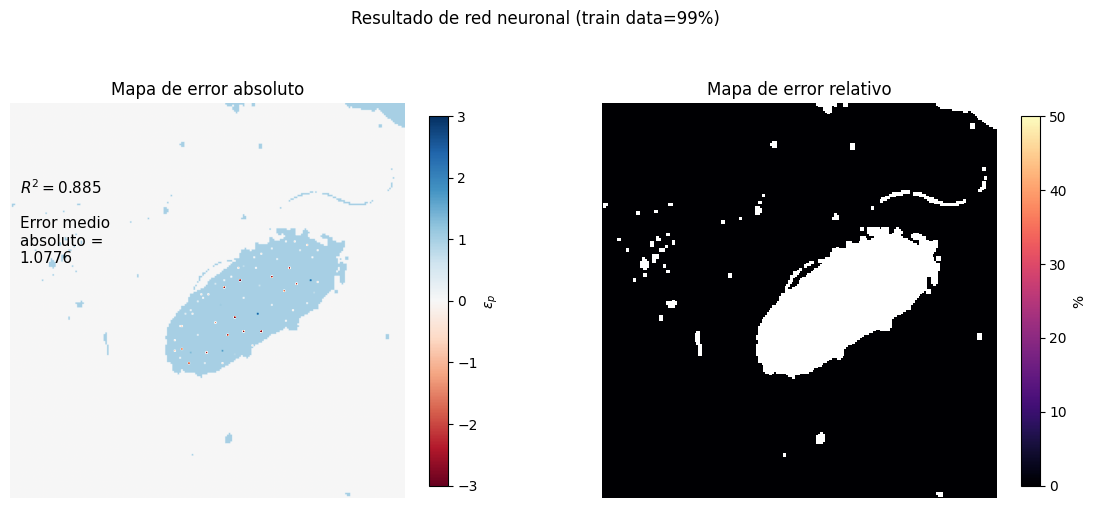

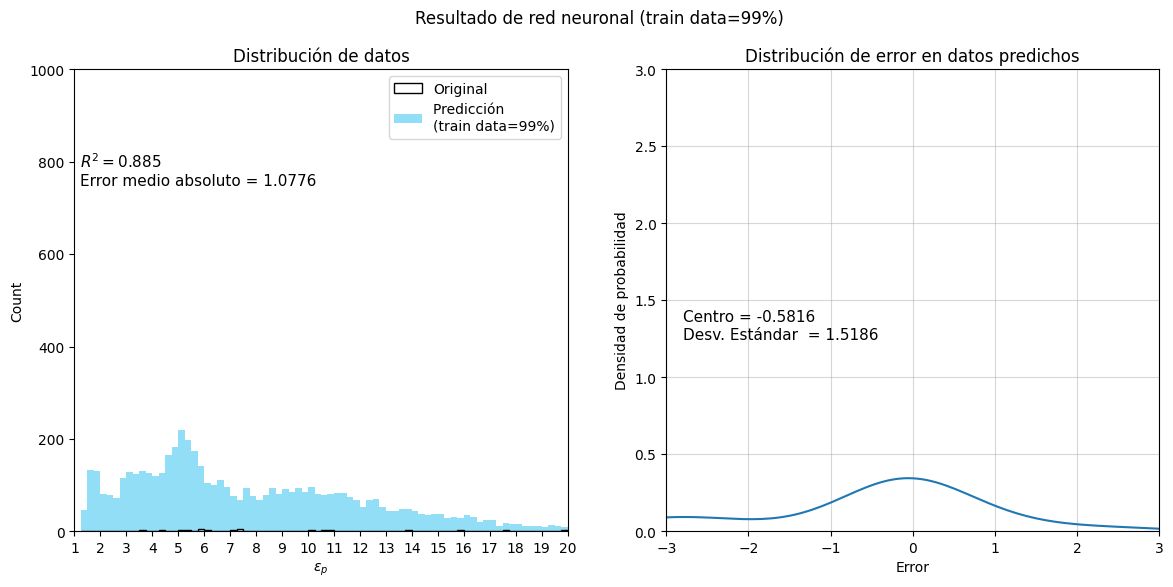

<Figure size 640x480 with 0 Axes>

In [14]:

ep_predict.predict(preproc.fc.x_masked_with_topo_norm,
              preproc.conv.x_cutouts_masked_from_topo)
ep_predict.reconstruct(add_train_data=0)
ep_predict.display_results(max_v=20)